In [1]:
import os
import sys

import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
from hydra import initialize, compose
import pickle
from glob import glob
from pprint import pprint
from tqdm import tqdm

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.lenses.test import SampleStrongLens
from mejiro.plots import diagnostic_plot, plot, plot_util, overplot
from mejiro.analysis import stats
from mejiro.utils import util
from mejiro.helpers import gs
from mejiro.lenses import lens_util

In [3]:
detectable_lenses = lens_util.get_detectable_lenses(config.machine.pipeline_dir, with_subhalos=True)
print(f'Number of detectable lenses: {len(detectable_lenses)}')

100%|██████████| 1098/1098 [01:13<00:00, 15.01it/s]

Number of detectable lenses: 1098


In [4]:
# detectable_lenses = lens_util.get_all_detectable_lenses(config.machine.pipeline_dir, with_subhalos=False)
# print(f'Number of detectable lenses: {len(detectable_lenses)}')

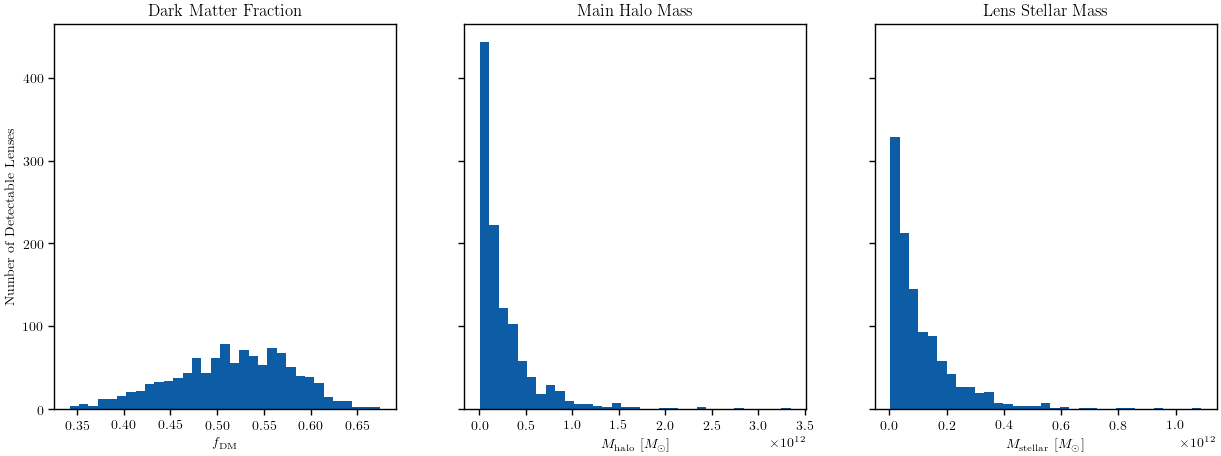

In [5]:
f_dm_list = [l.f_dm for l in detectable_lenses]
main_halo_mass_list = [l.main_halo_mass for l in detectable_lenses]
lens_stellar_mass_list = [l.lens_stellar_mass for l in detectable_lenses]

bins = int(np.sqrt(len(detectable_lenses)))
f, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
ax[0].hist(f_dm_list, bins=bins)
ax[1].hist(main_halo_mass_list, bins=bins)
ax[2].hist(lens_stellar_mass_list, bins=bins)
ax[0].set_ylabel('Number of Detectable Lenses')
ax[0].set_xlabel(r'$f_{\mathrm{DM}}$')
ax[1].set_xlabel(r'$M_{\mathrm{halo}}$ [$M_{\odot}$]')
ax[2].set_xlabel(r'$M_{\mathrm{stellar}}$ [$M_{\odot}$]')
ax[0].set_title('Dark Matter Fraction')
ax[1].set_title('Main Halo Mass')
ax[2].set_title('Lens Stellar Mass')
plt.show()

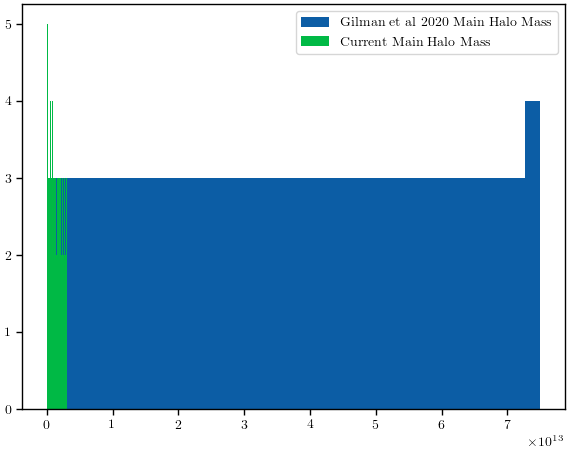

In [11]:
def gilman_main_halo(stellar_mass):
    return stellar_mass * 75

gilman_main_halo_masses = [gilman_main_halo(lens_stellar_mass) for lens_stellar_mass in lens_stellar_mass_list]

plt.hist(gilman_main_halo_masses, bins=bins, label='Gilman et al 2020 Main Halo Mass')
plt.hist(main_halo_mass_list, bins=bins, label='Current Main Halo Mass')
plt.legend()
plt.show()

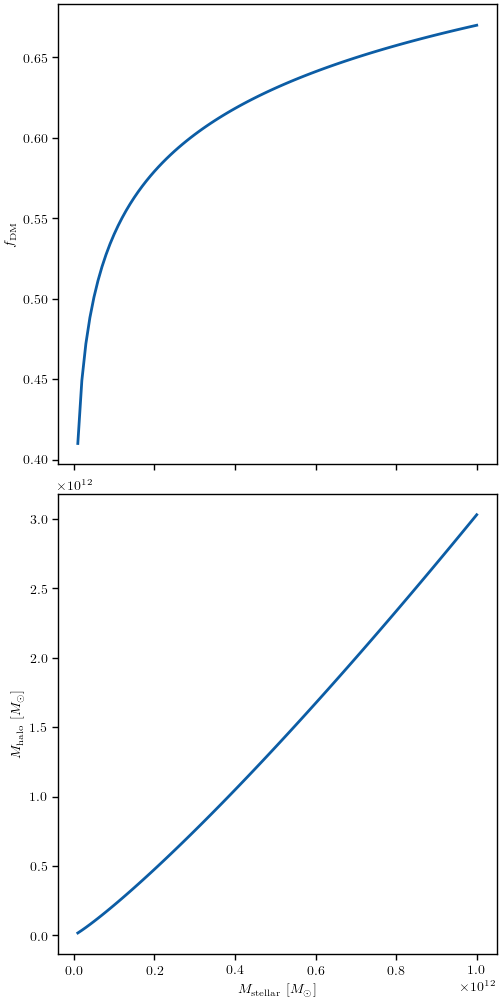

In [7]:
lens_stellar_mass_list = np.linspace(1e10, 1e12, 100)

a = 0.13
b = 0.54
f_dm_list = [a * np.log10(lsm / 1e11) + b for lsm in lens_stellar_mass_list]

main_halo_mass_list = [lsm / (1 - f) for lsm, f in zip(lens_stellar_mass_list, f_dm_list)]

f, ax = plt.subplots(2, 1, figsize=(5, 10), constrained_layout=True, sharex=True)
ax[0].plot(lens_stellar_mass_list, f_dm_list)
ax[1].plot(lens_stellar_mass_list, main_halo_mass_list)
ax[0].set_ylabel(r'$f_{\mathrm{DM}}$')
ax[1].set_ylabel(r'$M_{\mathrm{halo}}$ [$M_{\odot}$]')
ax[1].set_xlabel(r'$M_{\mathrm{stellar}}$ [$M_{\odot}$]')
plt.show()